# Pre-process raw data into .npz files

In [1]:
from __future__ import division, print_function # Makes division and printing work like python 3 (we're using 2)
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial import distance
import csv
%matplotlib inline
from numpy import arange, sin, pi, cos
from scipy.fftpack import fft, dct
import seaborn as sns;

sns.set(rc={'figure.figsize':(6.5,4)})


## Extrovert test set std

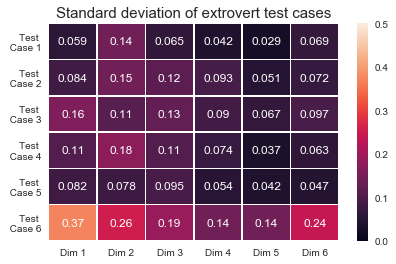

In [2]:
extro_test_std = np.zeros((6,6))
for i in range(1,7):
    motion_data = np.loadtxt("ExtrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    extro_test_std[i-1] = np.std(motion_data, axis = 0)

ylabels = ['Test \n Case 1', 'Test \n Case 2','Test \n Case 3','Test \n Case 4','Test \n Case 5','Test \n Case 6']
xlabels = ['Dim 1', 'Dim 2','Dim 3','Dim 4','Dim 5','Dim 6']

ax = plt.axes()
sns.heatmap(extro_test_std, vmin=0, vmax=0.5, linewidths=.5, annot=True, xticklabels = xlabels, yticklabels = ylabels, ax= ax)
ax.set_title('Standard deviation of extrovert test cases',size=15)
plt.yticks(rotation=0) 
plt.savefig("ExtroTestSTD.pdf")
plt.show()

## Extrovert validation set std

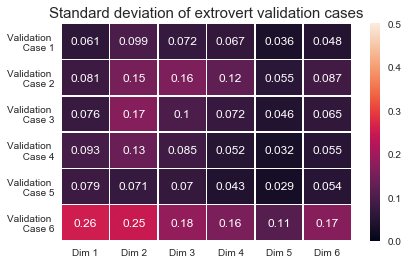

In [3]:
extro_validation_std = np.zeros((6,6))
for i in range(7,13):
    motion_data = np.loadtxt("ExtrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    extro_validation_std[i-7] = np.std(motion_data, axis = 0)

ylabels = ['Validation \n Case 1', 'Validation \n Case 2','Validation \n Case 3','Validation \n Case 4','Validation \n Case 5','Validation \n Case 6']
xlabels = ['Dim 1', 'Dim 2','Dim 3','Dim 4','Dim 5','Dim 6']

ax = plt.axes()

sns.heatmap(extro_validation_std, vmin=0, vmax=0.5, linewidths=.5, annot=True, xticklabels = xlabels, yticklabels = ylabels, ax= ax)
ax.set_title('Standard deviation of extrovert validation cases',size=15)
plt.savefig("ExtroValidationSTD.pdf")
plt.show()

## Introvert test set std

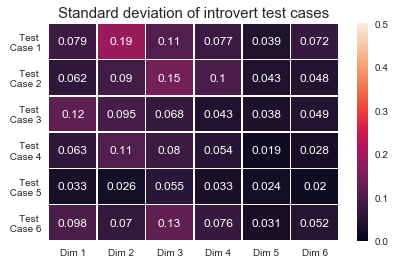

In [4]:
intro_test_std = np.zeros((6,6))
for i in range(1,7):
    motion_data = np.loadtxt("IntrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    intro_test_std[i-1] = np.std(motion_data, axis = 0)

ylabels = ['Test \n Case 1', 'Test \n Case 2','Test \n Case 3','Test \n Case 4','Test \n Case 5','Test \n Case 6']
xlabels = ['Dim 1', 'Dim 2','Dim 3','Dim 4','Dim 5','Dim 6']

ax = plt.axes()
sns.heatmap(intro_test_std, vmin=0, vmax=0.5, linewidths=.5, annot=True, xticklabels = xlabels, yticklabels = ylabels, ax= ax)
ax.set_title('Standard deviation of introvert test cases',size=15)
plt.yticks(rotation=0) 
plt.savefig("IntroTestSTD.pdf")
plt.show()

## Introvert validation set std

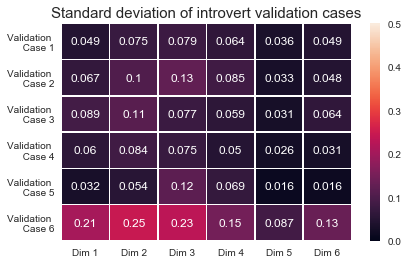

In [5]:
intro_validation_std = np.zeros((6,6))
for i in range(7,13):
    motion_data = np.loadtxt("IntrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    intro_validation_std[i-7] = np.std(motion_data, axis = 0)

ylabels = ['Validation \n Case 1', 'Validation \n Case 2','Validation \n Case 3','Validation \n Case 4','Validation \n Case 5','Validation \n Case 6']
xlabels = ['Dim 1', 'Dim 2','Dim 3','Dim 4','Dim 5','Dim 6']

ax = plt.axes()

sns.heatmap(intro_validation_std, vmin=0, vmax=0.5, linewidths=.5, annot=True, xticklabels = xlabels, yticklabels = ylabels, ax= ax)
ax.set_title('Standard deviation of introvert validation cases',size=15)
plt.yticks(rotation=0) 
plt.savefig("IntroValidationSTD.pdf")
plt.show()

In [9]:
extro_train_std = np.zeros((34,6))
for i in range(13,47):
    motion_data = np.loadtxt("ExtrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    extro_train_std[i-13] = np.std(motion_data, axis = 0)

extro_train_std_mean = np.mean(extro_train_std, axis=0)

In [10]:
intro_train_std = np.zeros((37,6))
for i in range(13,50):
    motion_data = np.loadtxt("IntrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    intro_train_std[i-13] = np.std(motion_data, axis = 0)

intro_train_std_mean = np.mean(intro_train_std, axis=0)

In [11]:
intro_train_std_mean

array([ 0.07746034,  0.12667762,  0.13849901,  0.09083592,  0.04122679,
        0.05392206])

In [12]:
extro_train_std_mean

array([ 0.09331182,  0.12422701,  0.11535936,  0.07773081,  0.04122263,
        0.06688682])

In [13]:
master_std = np.zeros((6,6))

master_std[0] = extro_train_std_mean
master_std[1] = np.mean(extro_validation_std, axis=0)
master_std[2] = np.mean(extro_test_std, axis=0)
master_std[3] = intro_train_std_mean
master_std[4] = np.mean(intro_validation_std, axis=0)
master_std[5] = np.mean(intro_test_std, axis=0)

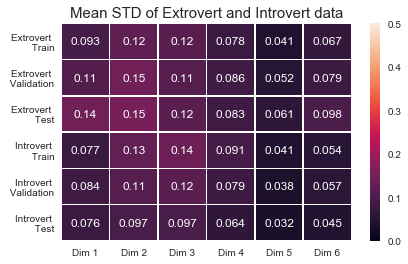

In [14]:
ylabels = ['Extrovert \n Train', 'Extrovert \n Validation','Extrovert \n Test','Introvert \n Train','Introvert \n Validation','Introvert \n Test']
xlabels = ['Dim 1', 'Dim 2','Dim 3','Dim 4','Dim 5','Dim 6']

ax = plt.axes()

sns.heatmap(master_std, vmin=0, vmax=0.5, linewidths=.5, annot=True, xticklabels = xlabels, yticklabels = ylabels, ax= ax)
ax.set_title('Mean STD of Extrovert and Introvert data',size=15)
plt.yticks(rotation=0) 
plt.savefig("masterSTD.pdf")
plt.show()

## Show an example motion data

In [20]:
motion_data = np.loadtxt("ExtrovertRawData/Motion/33.rov", skiprows=17, usecols=range(0, 6))

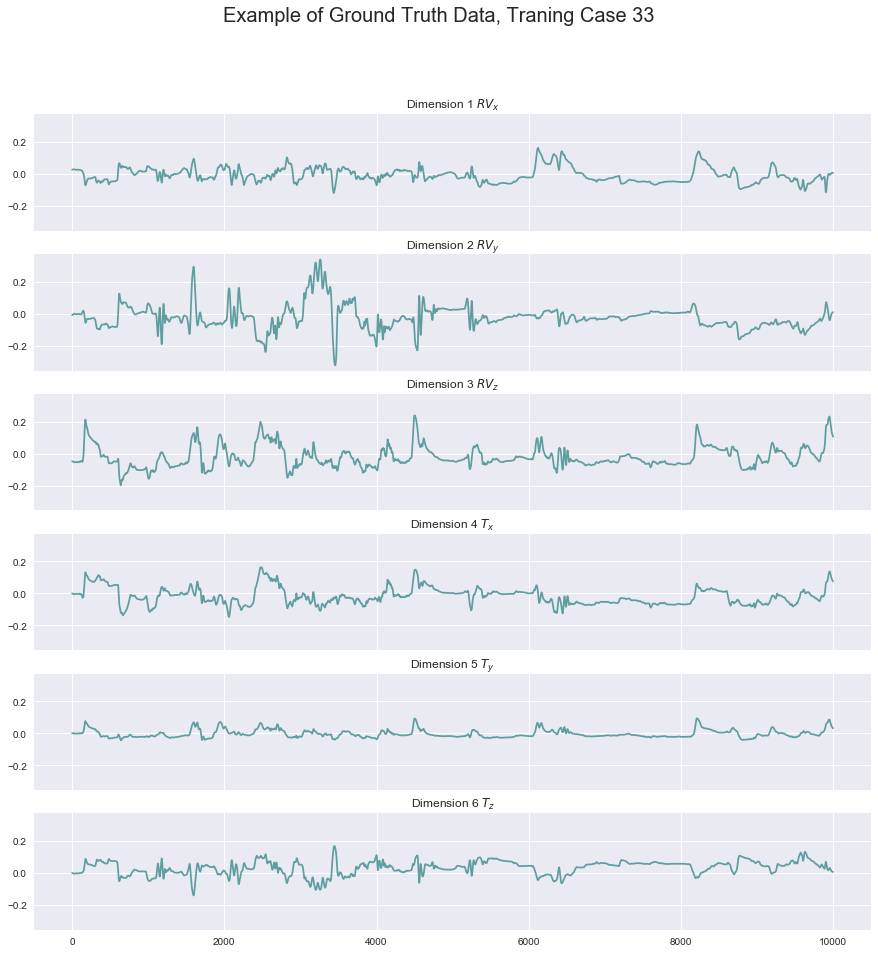

In [27]:
f, axarr = plt.subplots(6, sharex=True, sharey=True, figsize=(15,15))
axarr[0].plot(motion_data_trans[0, :10000], color = 'cadetblue')
axarr[0].set_title('Dimension 1 $RV_x$')
axarr[1].plot(motion_data_trans[1, :10000], color = 'cadetblue')
axarr[1].set_title('Dimension 2 $RV_y$')
axarr[2].plot(motion_data_trans[2, :10000], color = 'cadetblue')
axarr[2].set_title('Dimension 3 $RV_z$')
axarr[3].plot(motion_data_trans[3, :10000], color = 'cadetblue')
axarr[3].set_title('Dimension 4 $T_x$')
axarr[4].plot(motion_data_trans[4, :10000], color = 'cadetblue')
axarr[4].set_title('Dimension 5 $T_y$')
axarr[5].plot(motion_data_trans[5, :10000], color = 'cadetblue')
axarr[5].set_title('Dimension 6 $T_z$')
plt.suptitle('Example of Ground Truth Data, Traning Case 33', size = 20)
plt.savefig('exampleTrajectoryTrain33.pdf')
plt.show()

In [30]:
output = np.array([[1,1,1],[2,2,2],[3,3,3]])
target = np.array([[2,2,2],[4,4,4],[6,6,6]])

In [31]:
output

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [32]:
target

array([[2, 2, 2],
       [4, 4, 4],
       [6, 6, 6]])

In [33]:
a = (output - target)**2
a

array([[1, 1, 1],
       [4, 4, 4],
       [9, 9, 9]])

In [34]:
b = np.sum(a, axis = 1)
b

array([ 3, 12, 27])

In [35]:
c = np.mean(b)
c

14.0

In [37]:
d = np.sum(np.sum((output - target)**2, axis=1))
d

42